In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np


2024-06-08 17:00:36.803230: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-08 17:00:36.805492: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-08 17:00:36.834659: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-08 17:00:37.515673: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_frame_one = pd.read_csv('oneroom.csv', delimiter=';', header=0)
data_frame_two = pd.read_csv('tworoom.csv', delimiter=';', header=0)
data_frame_three = pd.read_csv('3room.csv', on_bad_lines='skip', delimiter=';', header=0)
data_frame_all = pd.read_csv('all.csv', delimiter=';', header=0) 
data_frame = result = pd.concat([data_frame_one, data_frame_two, data_frame_three, data_frame_all], ignore_index=True)

In [3]:
data_frame = data_frame[(data_frame['price'] <= 25000000) & (data_frame['price'] > 1000000)]

In [4]:
# data_frame = data_frame[data_frame['rooms_count'] > 0]
# data_frame = data_frame.query('rooms_count > 0')

In [5]:
data_frame['district'].unique()

array([nan, 'мкр. Школьный', 'мкр. 9-й километр', 'Прикубанский',
       'Карасунский', 'мкр. ХБК', 'мкр. Черемушки', 'мкр. КСК',
       'мкр. Гидростроителей', 'мкр. РИП', 'Черемушки мкр', 'Центральный',
       'мкр. Новознаменский', 'Новая Елизаветка кп', 'Догма Парк мкр',
       'мкр. Табачная фабрика', 'мкр. Калинино',
       'на 3 этаже. Новый жилой комплекс "Лето" от застройщика "ГК Дарстрой" расположен по адресу город Краснодар',
       'Плодородный-2 мкр', 'Сады Калинина мкр', 'мкр. Славянский',
       'Новознаменский ДНТ', 'Имени Петра Метальникова мкр',
       'Имени Демьяна Бедного жилмассив', 'мкр. Аврора',
       'мкр. Центральный', 'Музыкальный мкр', 'Зеленодар ЖК',
       'на 4 этаже. Новый жилой комплекс "Лето" от застройщика "ГК Дарстрой" расположен по адресу город Краснодар',
       'мкр. ЗИП', 'мкр. Фестивальный', 'мкр. Пашковский',
       'мкр. Восточно-Кругликовский', '2-я Площадка мкр',
       'на 13 этаже. Новый жилой комплекс "Dogma park" от застройщика "DOGMA" 

In [6]:
selected_data = data_frame[['price', 'district', 'floor', 'floors_count', 'rooms_count', 'total_meters']].fillna('')
mask = selected_data['district'].str.len() > 50
selected_data.loc[mask, 'district'] = ''

In [7]:
selected_data['district'].unique()

array(['', 'мкр. Школьный', 'мкр. 9-й километр', 'Прикубанский',
       'Карасунский', 'мкр. ХБК', 'мкр. Черемушки', 'мкр. КСК',
       'мкр. Гидростроителей', 'мкр. РИП', 'Черемушки мкр', 'Центральный',
       'мкр. Новознаменский', 'Новая Елизаветка кп', 'Догма Парк мкр',
       'мкр. Табачная фабрика', 'мкр. Калинино', 'Плодородный-2 мкр',
       'Сады Калинина мкр', 'мкр. Славянский', 'Новознаменский ДНТ',
       'Имени Петра Метальникова мкр', 'Имени Демьяна Бедного жилмассив',
       'мкр. Аврора', 'мкр. Центральный', 'Музыкальный мкр',
       'Зеленодар ЖК', 'мкр. ЗИП', 'мкр. Фестивальный', 'мкр. Пашковский',
       'мкр. Восточно-Кругликовский', '2-я Площадка мкр',
       'Западный Город ЖК', 'мкр. Дубинка',
       'Завод Измерительных Приборов мкр', 'мкр. Горхутор',
       'мкр. Комсомольский', 'мкр. ККБ', 'мкр. Немецкая Деревня',
       'Солнечный мкр', 'Почтовый мкр'], dtype=object)

In [8]:
data_frame = data_frame[data_frame['rooms_count'] > 0]
data_frame = data_frame.fillna(0)

In [9]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ddd = ohe.fit_transform(selected_data[['district']])
final_data = pd.concat([selected_data, ddd], axis=1)
final_data = final_data.drop('district', axis=1)

In [10]:
final_data

,price,floor,floors_count,rooms_count,total_meters,district_,district_2-я Площадка мкр,district_Догма Парк мкр,district_Завод Измерительных Приборов мкр,district_Западный Город ЖК,...,district_мкр. Новознаменский,district_мкр. Пашковский,district_мкр. РИП,district_мкр. Славянский,district_мкр. Табачная фабрика,district_мкр. Фестивальный,district_мкр. ХБК,district_мкр. Центральный,district_мкр. Черемушки,district_мкр. Школьный
0,7333600,2,17,1,35.60,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7800000,11,25,1,39.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6539520,3,12,1,41.60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4354200,9,16,1,35.40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5021580,15,16,1,32.95,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,8600000,2,24,3,77.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4551,14950000,10,16,3,74.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4552,9720000,7,7,2,88.30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4553,5400000,14,17,2,42.21,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
final_data = final_data.to_numpy()
data_train, data_test = train_test_split(
    final_data, 
    test_size=0.1, 
    random_state=100)
y_train, X_train = data_train[:, 0], data_train[:, 1:]
y_test, X_test = data_test[:, 0], data_test[:, 1:]

In [12]:
std = X_train.std(axis=0)
print(std)
X_train[:5]

[6.46445187e+00 6.03126789e+00 9.20951314e-01 2.77570335e+01
 4.82633445e-01 3.18061747e-02 1.48404752e-01 2.75484453e-02
 8.68173580e-02 7.27199491e-02 1.59091315e-02 7.27199491e-02
 1.82977037e-01 6.35155515e-02 2.24960606e-02 4.76790262e-02
 1.71629886e-01 1.59091315e-02 4.14417311e-01 4.20596169e-02
 1.59091315e-02 1.22307568e-01 5.02517297e-02 1.07284437e-01
 5.94284587e-02 5.50340385e-02 5.26977700e-02 1.59091315e-02
 1.59091315e-02 4.49579198e-02 1.59091315e-02 1.02566333e-01
 3.01009997e-01 2.24960606e-02 3.89445762e-02 8.08637873e-02
 4.20596169e-02 1.68125856e-01 9.76099580e-02 1.61602296e-01
 3.55558782e-02 1.60859134e-01 1.59091315e-02 1.53206397e-01
 1.10685038e-01]


array([[ 2.  ,  9.  ,  2.  , 76.04,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [11.  , 16.  ,  1.  , 41.8 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 2.  ,  7.  ,  2.  , 62.11,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
    

In [13]:
mean = X_train.mean(axis=0)
X_train -= mean
X_test -= mean
std = X_train.std(axis=0)
X_train /= std
X_test /= std

In [14]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.1, 
    random_state=100)

In [15]:
model = models.Sequential()
model.add(
    layers.Dense(
        1024, activation='relu',
        input_shape=(X_train.shape[1],),
        kernel_regularizer=regularizers.l1_l2(0.001, 0.001)
    )
)
model.add(layers.Dense(
    2048, activation='tanh',
    kernel_regularizer=regularizers.l1_l2(0.001, 0.001)
    )
)
model.add(
    layers.Dense(
        512, activation='relu', 
        kernel_regularizer=regularizers.l1_l2(0.001, 0.001)
    )
)
model.add(
    layers.Dense(
        256, activation='relu', 
        kernel_regularizer=regularizers.l1_l2(0.001, 0.001)
    )
)
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

/home/kitaro/diploma/final_parser/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history = model.fit(X_tr, y_tr, epochs=100, batch_size=16, verbose=0, validation_data=(X_val, y_val))
val_mse_score, val_mae_score = model.evaluate(X_val, y_val)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4159358631936.0000 - mae: 1165256.1250


In [15]:
model.save('/home/kitaro/diploma/ml_predict_flat_costs/models/flat_model.h5')

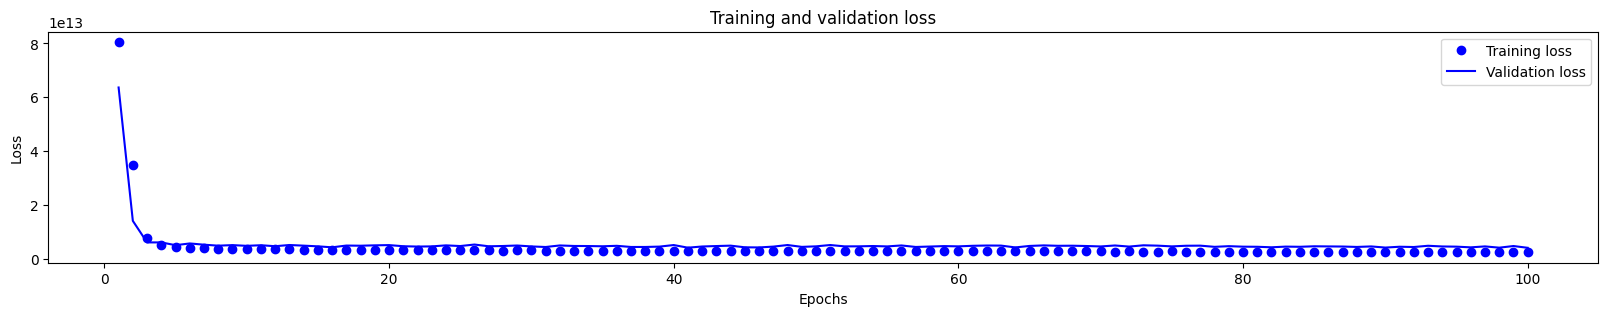

In [17]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['mae']) + 1)

plt.figure(figsize=(20, 3))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
# y_pred = model.predict(X_test)
# на тестовой меньше ошибка 
mse, mae = model.evaluate(X_test, y_test, verbose=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3981882949632.0000 - mae: 1175287.6250


In [19]:
y_pred = model.predict(X_test)

print(y_pred[9][0], y_test[9])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6989722.5 7402140.0


In [17]:
y_pred = model.predict(X_test)

print(y_pred[9][0], y_test[9])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6741129.5 7402140.0


In [90]:
merg_ = ddd[:1]
## Создадим тестовые данные для модели в кка
df_t = pd.DataFrame([{
    'floor': 5,
    'floors_count': 24,
    'rooms_count': 1,
    'total_meters': 36.5,
}])
new = pd.concat([df_t, merg_], axis=1)
new[['district_']]= 0.0
new[['district_мкр. Школьный']]= 0.0
new[['district_Завод Измерительных Приборов мкр']]= 0.0
new[['district_Черемушки мкр']]= 1.0
new[['district_Догма Парк мкр']]= 0.0

In [91]:
new -= mean
new /= std

In [92]:
y_test[:10]

array([ 5260080.,  4848692.,  5541930., 20179500., 20728425.,  7544000.,
        5778300.,  4710100.,  4927000.,  7402140.])

In [93]:
new = new.to_numpy() 
new_pred_test = model.predict(new)
print(new_pred_test[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
7227104.5
